In [57]:
import os
import pandas as pd
from sklearn.cluster import KMeans
import plotting
import importlib
importlib.reload(plotting)

<module 'plotting' from '/home/frankwoods/Desktop/lassie/plotting.py'>

# Load in all depth vs resistance curves into a dataframe list

In [58]:
def load_data(data_src):
    depth_resist_curve_df_list = [] # used for plotting
    filename_list = []
    for filename in os.listdir(data_src):
        df = pd.read_csv(f"{data_src}/{filename}")
        depth_resist_curve_df_list.append(df)
        filename_list.append(filename)
    return depth_resist_curve_df_list, filename_list

data_src = "data/cleaned_data"
depth_resist_curve_df_list, filename_list = load_data(data_src)
filename_to_depth_resist = dict(zip(filename_list, depth_resist_curve_df_list))
data_features_df = pd.read_csv("data/features.csv")
non_features_list = ['filenames', 'feifeis_ylabels', 'liams_ylabels', 'marions_ylabels', 'distances']
clustering_features_df = data_features_df.drop(non_features_list, axis=1)

# Correlation Matrix

In [59]:
print(clustering_features_df.corr())

                    overall_slope  max_depth  max_resistance  num_peaks  \
overall_slope            1.000000  -0.951302        0.930178  -0.566060   
max_depth               -0.951302   1.000000       -0.858433   0.567990   
max_resistance           0.930178  -0.858433        1.000000  -0.523997   
num_peaks               -0.566060   0.567990       -0.523997   1.000000   
largest_force_drop      -0.350411   0.387122       -0.260562   0.609810   
curve_shape              0.002262   0.060331        0.039995   0.036346   

                    largest_force_drop  curve_shape  
overall_slope                -0.350411     0.002262  
max_depth                     0.387122     0.060331  
max_resistance               -0.260562     0.039995  
num_peaks                     0.609810     0.036346  
largest_force_drop            1.000000    -0.096915  
curve_shape                  -0.096915     1.000000  


# Optimum Feature #1:

                    overall_slope  largest_force_drop  curve_shape
overall_slope            1.000000           -0.350411     0.002262
largest_force_drop      -0.350411            1.000000    -0.096915
curve_shape              0.002262           -0.096915     1.000000


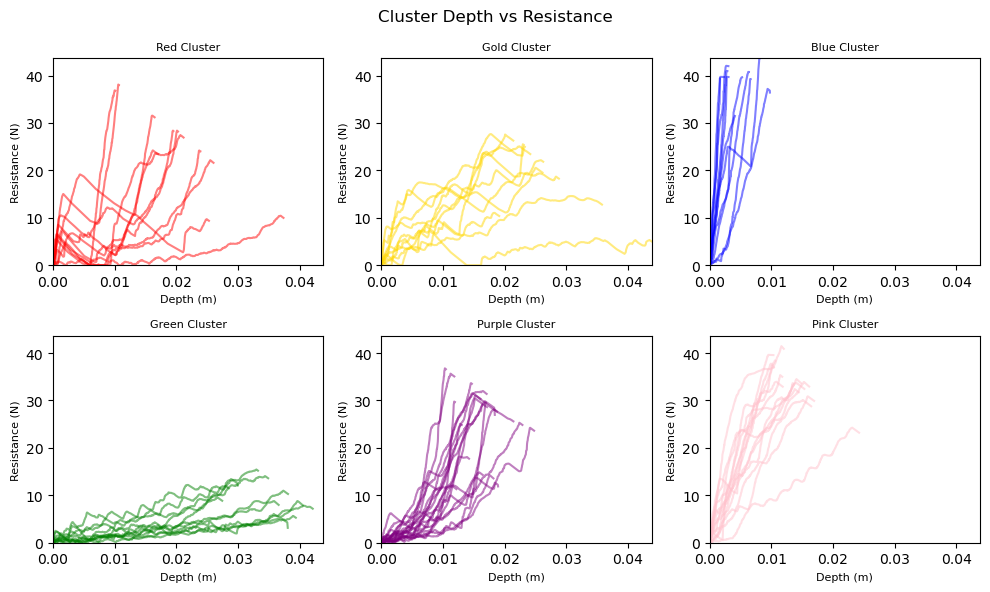

In [60]:
kmeans_elbow = 6
optimum_features_1 = clustering_features_df[["overall_slope", "largest_force_drop", "curve_shape"]]
print(optimum_features_1.corr())
kmeans = KMeans(n_clusters=kmeans_elbow, init="k-means++", n_init=100).fit(optimum_features_1)
plotting.plot_clusters_seperately(kmeans.labels_, optimum_features_1.index.tolist(), depth_resist_curve_df_list, data_features_df, "kmeans")
plotting.plot_pca(optimum_features_1, y_labels=kmeans.labels_, num_pc=3, graph_title="kmeans")

# Optimum Feature #2:

                    max_depth  largest_force_drop  curve_shape
max_depth            1.000000            0.387122     0.060331
largest_force_drop   0.387122            1.000000    -0.096915
curve_shape          0.060331           -0.096915     1.000000


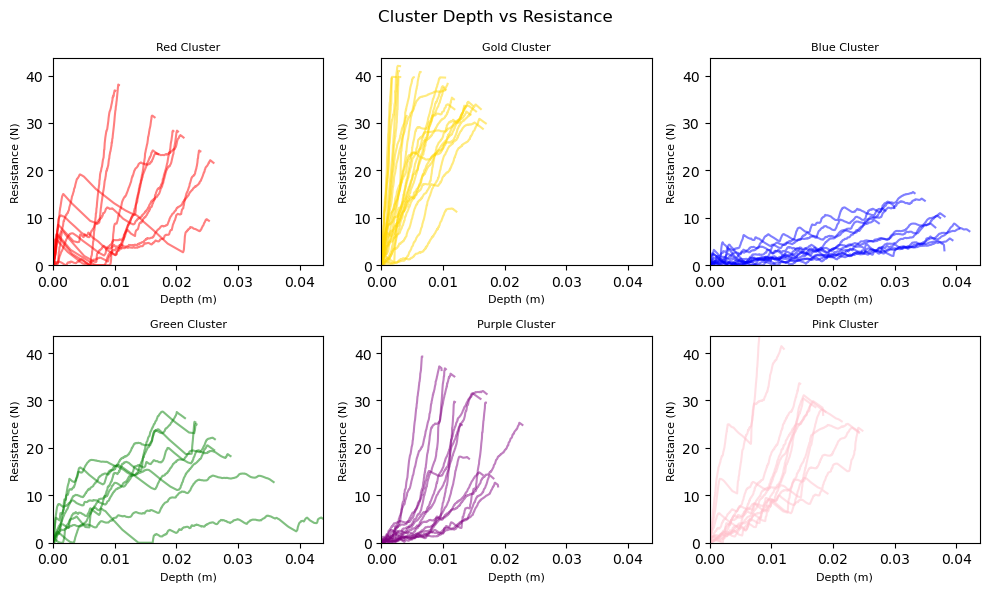

In [61]:
kmeans_elbow = 6
optimum_features_1 = clustering_features_df[["max_depth", "largest_force_drop", "curve_shape"]]
print(optimum_features_1.corr())
kmeans = KMeans(n_clusters=kmeans_elbow, init="k-means++", n_init=100).fit(optimum_features_1)
plotting.plot_clusters_seperately(kmeans.labels_, optimum_features_1.index.tolist(), depth_resist_curve_df_list, data_features_df, "kmeans")
plotting.plot_pca(optimum_features_1, y_labels=kmeans.labels_, num_pc=3, graph_title="kmeans")

# Optimum Feature #3:

                    max_resistance  largest_force_drop  curve_shape
max_resistance            1.000000           -0.260562     0.039995
largest_force_drop       -0.260562            1.000000    -0.096915
curve_shape               0.039995           -0.096915     1.000000


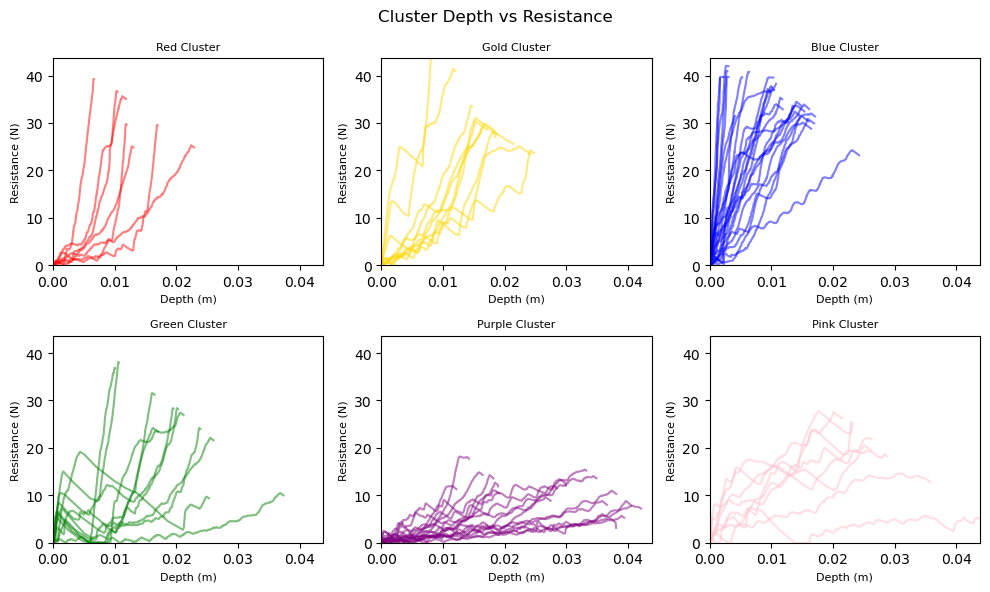

In [62]:
kmeans_elbow = 6
optimum_features_1 = clustering_features_df[["max_resistance", "largest_force_drop", "curve_shape"]]
print(optimum_features_1.corr())
kmeans = KMeans(n_clusters=kmeans_elbow, init="k-means++", n_init=100).fit(optimum_features_1)
plotting.plot_clusters_seperately(kmeans.labels_, optimum_features_1.index.tolist(), depth_resist_curve_df_list, data_features_df, "kmeans")
plotting.plot_pca(optimum_features_1, y_labels=kmeans.labels_, num_pc=3, graph_title="kmeans")